In [2]:
%load_ext autoreload
%autoreload 2

>> #### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

>> #### Import required modules

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from preprocess import Preprocess
from plot import Plot

Initialize loaddata, plot class

In [5]:
loader = LoadData()
preprocess = Preprocess()
plot = Plot()

Load datasets from csv files

In [5]:
# # Get URL from DVC
# path = 'data/AdSmartABdata.csv'
# repo = 'https://github.com/jedisam/abtest-mlops'
# version = '6db449393c9626c4fbca44946dfa103660685a27'

In [6]:
train_df = loader.read_csv('../data/train.csv')
test_df = loader.read_csv('../data/test.csv')
store_df = loader.read_csv('../data/store.csv')
sub_df = loader.read_csv('../data/sample_submission.csv')

/tmp/ipykernel_17636/546756437.py:1: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  train_df = loader.read_csv('../data/train.csv')


>> Data overview of each dataset

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There is no missing data in the training set.

In [60]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [61]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [62]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [63]:
train_df.shape

(1017209, 9)

In [64]:
store_df.shape

(1115, 10)

In [65]:
test_df.shape

(41088, 8)

Store is a separate table from the sales data, so we need to join the two it with train_df

In [66]:
train_joined = preprocess.join_dataframes(train_df, store_df, 'Store', 'left')
test_joined = preprocess.join_dataframes(test_df, store_df, 'Store', 'left')

Get overview of merged Data

In [67]:
train_joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [68]:
test_joined.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


Change date column to datetime

In [69]:
# Change the date column to datetime
train_joined = preprocess.convert_to_datetime(train_joined, 'Date')
test_joined = preprocess.convert_to_datetime(test_joined, 'Date')

Extract relevant fields from Date column

In [70]:
train_joined = preprocess.extract_fields_date(train_joined, 'Date')
test_joined = preprocess.extract_fields_date(test_joined, 'Date')

Use the Date as an index

In [71]:
train_joined.set_index('Date', inplace=True)
test_joined.set_index('Date', inplace=True)

In [ ]:
train_joined.to_csv('../data/train_joined.csv', index=True)
test_joined.to_csv('../data/test_joined.csv', index=True)

In [6]:
train_df = loader.read_csv('../data/train_joined.csv')
test_df = loader.read_csv('../data/test_joined.csv')

In [8]:
# Sales_per_day, Customers_per_day, avg_sales_per_customer and Sales_per_customers_per_day

# Get total sales, customers and open days per store
store_data_sales = train_df.groupby([train_df['Store']])['Sales'].sum()
store_data_customers = train_df.groupby([train_df['Store']])['Customers'].sum()
store_data_avg_sales = train_df.groupby([train_df['Store']])['Sales'].mean()
store_data_avg_customers = train_df.groupby([train_df['Store']])['Customers'].mean()
store_data_open = train_df.groupby([train_df['Store']])['Open'].count()

# Calculate sales per day, customers per day and sales per customers per day
store_data_sales_per_day = store_data_sales / store_data_open
store_data_customers_per_day = store_data_customers / store_data_open
store_data_avg_sales_per_customer = store_data_avg_sales / store_data_avg_customers
store_data_sales_per_customer_per_day = store_data_sales_per_day / store_data_customers_per_day

#Saving the above values in a dictionary so that they can be mapped to the dataframe.
sales_per_day_dict = dict(store_data_sales_per_day)
customers_per_day_dict = dict(store_data_customers_per_day)
avg_sales_per_customer_dict = dict(store_data_avg_sales_per_customer)
sales_per_customers_per_day_dict = dict(store_data_sales_per_customer_per_day)



train_df['SalesPerDay'] = train_df['Store'].map(sales_per_day_dict)
train_df['Customers_per_day'] = train_df['Store'].map(customers_per_day_dict)
train_df['Avg_Sales_per_Customer'] = train_df['Store'].map(avg_sales_per_customer_dict)
train_df['Sales_Per_Customers_Per_Day'] = train_df['Store'].map(sales_per_customers_per_day_dict)

test_df['Sales_per_day'] = test_df['Store'].map(sales_per_day_dict)
test_df['Customers_per_day'] = test_df['Store'].map(customers_per_day_dict)
test_df['Avg_Sales_per_Customer'] = test_df['Store'].map(avg_sales_per_customer_dict)
test_df['Sales_Per_Customers_Per_Day'] = test_df['Store'].map(sales_per_customers_per_day_dict)

In [ ]:
freq2_dict_no_log = dict()
freq3_dict_no_log = dict()

amp2_dict_no_log = dict()
amp3_dict_no_log = dict()

for feat_1 in ('Year','Month'):
        for i in range(min(train_df[feat_1].unique()), max(train_df[feat_1].unique()) + 1):

            a = train_df.loc[train_df[feat_1]==i]
            a_sales = a['Sales']

            Y = np.fft.fft(a_sales.values)
            Y = abs(Y)
            freq = np.fft.fftfreq(len(Y), 1)

            intercept_index = np.argmax(Y)
            Y = np.delete(Y, intercept_index)
            freq = np.delete(freq, intercept_index)

            amplitude_1_index = np.argmax(Y)
            amplitude_1 = Y[amplitude_1_index]
            Y = np.delete(Y, amplitude_1_index)
            freq_1 = freq[amplitude_1_index]
            freq = np.delete(freq, amplitude_1_index)

            amplitude_2_index = np.argmax(Y)
            amplitude_2 = Y[amplitude_2_index]
            Y = np.delete(Y, amplitude_2_index)
            freq_2 = freq[amplitude_2_index]
            freq = np.delete(freq, amplitude_2_index)

            amplitude_3_index = np.argmax(Y)
            amplitude_3 = Y[amplitude_3_index]
            Y = np.delete(Y, amplitude_3_index)
            freq_3 = freq[amplitude_3_index]
            freq = np.delete(freq, amplitude_3_index)
            

            #Freq_1 is not included because it seems as it is always 0
            a[f'Frequency_2_{feat_1}_Sales'] = freq_2
            a[f'Frequency_3_{feat_1}_Sales'] = freq_3

            a[f'Amplitude_2_{feat_1}_Sales'] = amplitude_2
            a[f'Amplitude_3_{feat_1}_Sales'] = amplitude_3


            freq2_dict_no_log[i] = freq_2
            freq3_dict_no_log[i] = freq_3

            amp2_dict_no_log[i] = amplitude_2
            amp3_dict_no_log[i] = amplitude_3


            if i == min(train_df[feat_1].unique()):
                k = a
            else:
                k = pd.concat([k,a])
        train_df = k
        test_df[f'Frequency_2_{feat_1}_Sales'] = test_df[feat_1].map(freq2_dict_no_log)
        test_df[f'Frequency_3_{feat_1}_Sales'] = test_df[feat_1].map(freq3_dict_no_log)
        test_df[f'Amplitude_2_{feat_1}_Sales'] = test_df[feat_1].map(amp2_dict_no_log)
        test_df[f'Amplitude_3_{feat_1}_Sales'] = test_df[feat_1].map(amp3_dict_no_log)
        freq2_dict_no_log = dict()
        freq3_dict_no_log = dict()
        amp2_dict_no_log = dict()
        amp3_dict_no_log = dict()

In [ ]:
feats = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
modes = train_df[feats].mode()

for f in feats:
        train_df[f] = train_df[f].fillna(modes[f][0])
        test_df[f] = test_df[f].fillna(modes[f][0])

#---------------------------------------------------------------------------------------------------------------- 
def convertCompetitionOpen(df):
    try:
        date = '{}-{}'.format(int(df['CompetitionOpenSinceYear']), int(df['CompetitionOpenSinceMonth']))
        return pd.to_datetime(date)
    except:
        return np.nan

train_df['CompetitionOpenInt'] = train_df.apply(lambda df: convertCompetitionOpen(df), axis=1).astype(np.int64)
test_df['CompetitionOpenInt'] = test_df.apply(lambda df: convertCompetitionOpen(df), axis=1).astype(np.int64)

In [12]:
train_df.drop('Customers',inplace = True, axis=1)  #Because it is not in the test set

In [13]:
train_df.drop('StateHoliday',inplace=True,axis=1)  #Because it reduces the performance
test_df.drop('StateHoliday',inplace=True,axis=1)

In [14]:
train_df.sort_values(["Store"], ignore_index=True, inplace=True)
test_df.sort_values(["Store"], ignore_index=True, inplace=True)
train_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)
test_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)

In [15]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionDistance,2642,0.3
Day,0,0.0
Customers_per_day,0,0.0
Avg_Sales_per_Customer,0,0.0
Sales_Per_Customers_Per_Day,0,0.0
Frequency_2_Year_Sales,0,0.0
Date,0,0.0


In [16]:
#missing data percentage (Testing)
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionDistance,96,0.2
Open,11,0.0
Frequency_3_Year_Sales,0,0.0
Avg_Sales_per_Customer,0,0.0
Sales_Per_Customers_Per_Day,0,0.0
Frequency_2_Year_Sales,0,0.0
Date,0,0.0


In [19]:
feats = ['Promo2SinceYear','Promo2SinceWeek','CompetitionDistance', 'PromoInterval']
modes = train_df[feats].mode()

for f in feats:
        train_df[f] = train_df[f].fillna(modes[f][0])
        test_df[f] = test_df[f].fillna(modes[f][0])
for dataset in (train_df,test_df):
    dataset['Open'] = dataset['Open'].fillna(0)

In [20]:
train_df = train_df[train_df['Sales'] < 25000]  #Drops samples which have sales more than 25000
train_df.reset_index(drop=True)

,Date,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Sales_Per_Customers_Per_Day,Frequency_2_Year_Sales,Frequency_3_Year_Sales,Amplitude_2_Year_Sales,Amplitude_3_Year_Sales,Frequency_2_Month_Sales,Frequency_3_Month_Sales,Amplitude_2_Month_Sales,Amplitude_3_Month_Sales,CompetitionOpenInt
0,2015-07-31,1,4,5263,1,1,1,c,a,1270.0,...,8.437366,-0.429245,-0.141509,2.107100e+08,1.915047e+08,-0.064516,0.290312,7.847162e+07,7.174168e+07,1220227200000000000
1,2015-07-31,2,4,6064,1,1,1,a,a,570.0,...,8.482725,-0.429245,-0.141509,2.107100e+08,1.915047e+08,-0.064516,0.290312,7.847162e+07,7.174168e+07,1193875200000000000
2,2015-07-31,3,4,8314,1,1,1,a,a,14130.0,...,9.255808,-0.429245,-0.141509,2.107100e+08,1.915047e+08,-0.064516,0.290312,7.847162e+07,7.174168e+07,1164931200000000000
3,2015-07-31,4,4,13995,1,1,1,c,c,620.0,...,7.292138,-0.429245,-0.141509,2.107100e+08,1.915047e+08,-0.064516,0.290312,7.847162e+07,7.174168e+07,1251763200000000000
4,2015-07-31,5,4,4822,1,1,1,a,a,29910.0,...,8.702634,-0.429245,-0.141509,2.107100e+08,1.915047e+08,-0.064516,0.290312,7.847162e+07,7.174168e+07,1427846400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016445,2013-01-01,1111,1,0,0,0,1,a,a,1900.0,...,11.626239,0.284932,0.142466,3.206477e+08,3.098658e+08,-0.290316,0.419349,7.097140e+07,5.359914e+07,1401580800000000000
1016446,2013-01-01,1112,1,0,0,0,1,c,c,1880.0,...,12.206623,0.284932,0.142466,3.206477e+08,3.098658e+08,-0.290316,0.419349,7.097140e+07,5.359914e+07,1143849600000000000
1016447,2013-01-01,1113,1,0,0,0,1,a,c,9260.0,...,9.243499,0.284932,0.142466,3.206477e+08,3.098658e+08,-0.290316,0.419349,7.097140e+07,5.359914e+07,1377993600000000000
1016448,2013-01-01,1114,1,0,0,0,1,a,c,870.0,...,6.456391,0.284932,0.142466,3.206477e+08,3.098658e+08,-0.290316,0.419349,7.097140e+07,5.359914e+07,1377993600000000000


In [21]:
attributes = ['StoreType','Assortment','PromoInterval']
for dataset in (train_df,test_df):
    for f in attributes:
        dataset[attributes] = dataset[attributes].apply(lambda x: pd.factorize(x)[0])

/home/jedi/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
train_df = train_df[train_df['Open'] == 1]
train_df = train_df[train_df['Sales'] > 0.0]

In [23]:
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                          1.000000
SalesPerDay                    0.764418
Customers_per_day              0.605220
Promo                          0.373668
Assortment                     0.122939
Month                          0.072107
Amplitude_2_Month_Sales        0.065165
Frequency_2_Month_Sales        0.053439
Amplitude_3_Month_Sales        0.048723
SchoolHoliday                  0.039551
Year                           0.037963
StoreType                      0.036662
CompetitionOpenSinceYear       0.010112
CompetitionOpenInt             0.008608
Store                          0.007054
Promo2SinceWeek                0.001149
Frequency_3_Month_Sales       -0.001432
Avg_Sales_per_Customer        -0.007492
Sales_Per_Customers_Per_Day   -0.007492
Frequency_3_Year_Sales        -0.010518
Amplitude_2_Year_Sales        -0.030896
Amplitude_3_Year_Sales        -0.031941
CompetitionDistance           -0.033220
CompetitionOpenSinceMonth     -0.033734
Frequency_2_Year_Sales        -0.039090


In [9]:
train_df.set_index('Date', inplace=True)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

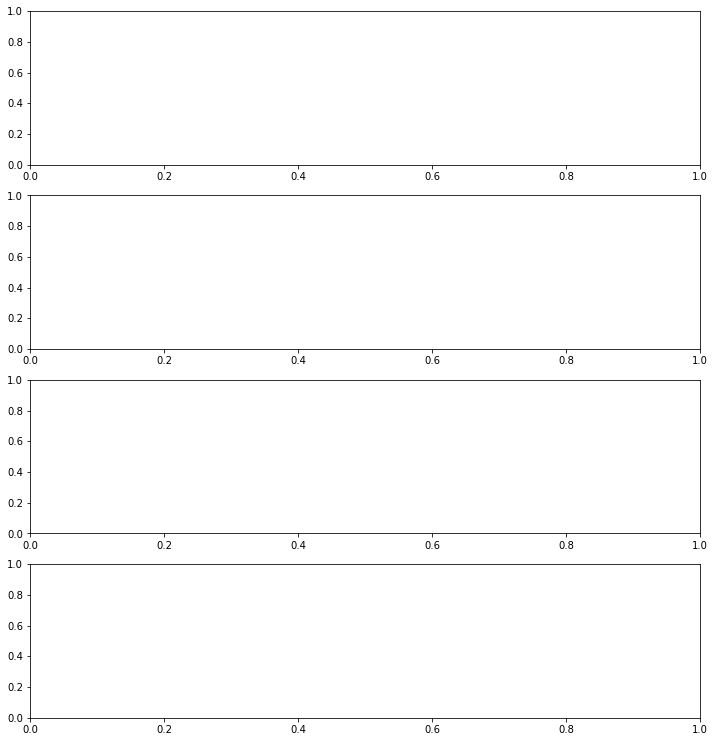

In [10]:
import matplotlib.pyplot as plt
# preparation: input should be float type
train_df['Sales'] = train_df['Sales'] * 1.0

# store types
sales_a = train_df[train_df.Store == 2]['Sales']
sales_b = train_df[train_df.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train_df[train_df.Store == 1]['Sales']
sales_d = train_df[train_df.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)